# Imports

In [30]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

# For Random Dataset

### Dataset

In [5]:
np.random.seed(0)

In [19]:
x , y = make_blobs(n_samples=5000, n_features=2, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(x)
print(y)

[[ 0.23533031  0.58280128]
 [ 3.36127001  2.20183241]
 [-1.38423017 -1.68118353]
 ...
 [-1.45166369 -0.7917711 ]
 [ 2.87644642 -1.70830299]
 [ 4.48206196  5.60433121]]
[3 0 1 ... 1 2 0]


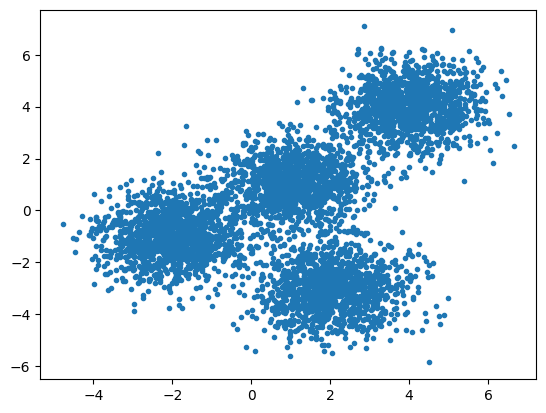

In [20]:
plt.scatter(x[:, 0], x[:, 1], marker='.')

### K-Means

In [23]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [24]:
k_means.fit(x)

KMeans(n_clusters=4, n_init=12)

In [25]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 0, 1, ..., 1, 3, 0])

In [26]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.99449908,  4.01722832],
       [-2.02282907, -1.01688165],
       [ 1.06762428,  1.03077947],
       [ 2.05084974, -3.04332993]])

### Plot

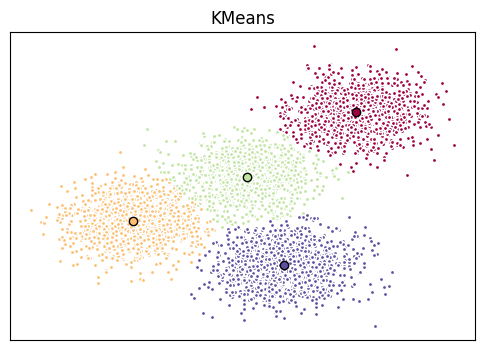

In [28]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


# For Real Dataset

### Dataset

In [31]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-Proccessing

In [32]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [33]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### KMeans

In [39]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [40]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [41]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[3.29676923e+01, 1.61384615e+00, 6.38923077e+00, 3.12046154e+01,
        1.03271077e+00, 2.10834462e+00, 2.36923077e-01, 1.00953846e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00],
       [4.13681319e+01, 1.96153846e+00, 1.52527473e+01, 8.40769231e+01,
        3.11441209e+00, 5.77035165e+00, 1.37362637e-01, 1.07258242e+01]])

### Insights

In [43]:
df['Cluster_Code'] = k_means_labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster_Code
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [46]:
df.groupby('Cluster_Code').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster_Code,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


### Plot

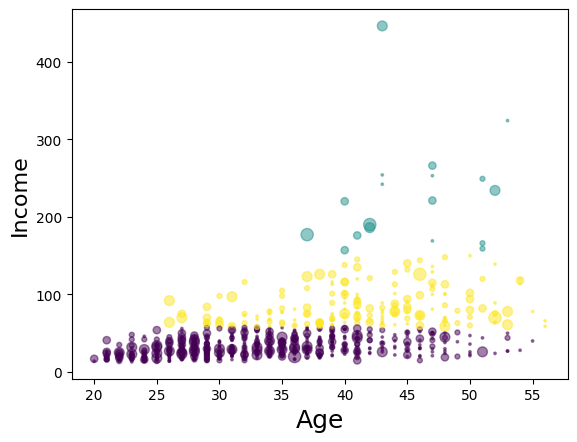

In [48]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means_labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

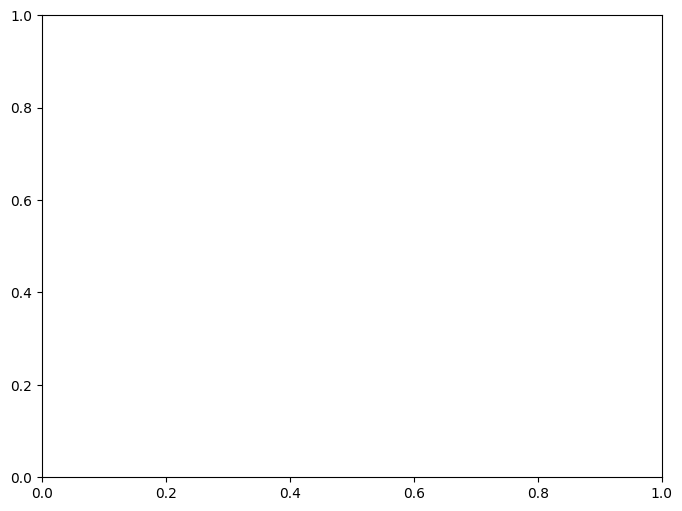

In [50]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= k_means_labels.astype(np.float64))


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
df = pd.DataFrame({
    'Age': [25, 30, 35],
    'Annual Income': [40000, 50000, 60000],
    'Spending Score': [60, 70, 80],
    'Gender_num': [0, 1, 0]
})

# Convert all columns to float64
df = df.astype('float64')

# Check for NaNs and data types
print(df.isnull().sum())  # No NaNs should be present
print(df.dtypes)  # All should be float64

# Convert to numpy array
x = df.values

# Normalize the data
scaler = StandardScaler()
norm_x = scaler.fit_transform(x)

print(norm_x)


Age               0
Annual Income     0
Spending Score    0
Gender_num        0
dtype: int64
Age               float64
Annual Income     float64
Spending Score    float64
Gender_num        float64
dtype: object
[[-1.22474487 -1.22474487 -1.22474487 -0.70710678]
 [ 0.          0.          0.          1.41421356]
 [ 1.22474487  1.22474487  1.22474487 -0.70710678]]
